### 南京日报经济指数分析

对于特定人（nr，PER），其属性（a或n）、行为（v）及相应程度（adv）在不同时间（t）或地点（ns）的频次分布，
展示为横坐标为时间，纵坐标为频次，相关节点为相应的属性（a或n）、行为（v）及相应程度（adv），特定人（nr，PER）可以根据用户需要选择确定。

In [1]:
import jieba
import pandas as pd
import pkuseg
from ltp import LTP

from posmain import CORPUS_DIR
from utils.nlputils import get_docs_from_corpus, index_parser

In [2]:
import numpy as np
import math
import os
from collections import Counter

In [3]:
# 对每个文件，分析之后汇总结果。
CSV_FILE = './econ_index.csv'

In [4]:
if not os.path.isfile(CSV_FILE):
    ltp = LTP()
    seg = pkuseg.pkuseg(model_name="news", postag=True)  # 开启词性标注功能
    jieba.enable_paddle()  # 启动paddle模式。 0.40版之后开始支持，早期版本不支持

    dfs = []
    for did, (doc, dfname) in enumerate(get_docs_from_corpus(corpus_dir=CORPUS_DIR)):
        if did >= 50:
            break
        df = index_parser(doc, ltp=ltp, seg=seg)
        dfs.append(df)
    dfs = pd.concat(dfs, ignore_index=True)
    dfs.to_csv(CSV_FILE, index=False)
else:
    dfs = pd.read_csv(CSV_FILE)

In [6]:
# 所有人名，出现篇章的频次
pers = []
for ps in dfs['PER']:
    ps = eval(ps)
    pers += ps
Counter(pers).most_common(10)[1:]

[('沈文祖', 2),
 ('江瑜', 2),
 ('霍慧萍', 2),
 ('林克勤', 2),
 ('张俊', 2),
 ('周全', 2),
 ('蒋跃建', 2),
 ('冯兴', 2),
 ('余梦娇', 2)]

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
np.random.seed(100)    


In [7]:
def draw_point(name, field):
    """
    绘制词汇的点图
    name: 人名
    field: 绘制的域
    """
    # 人名
    per_name = name

    # 绘制属性
    df = dfs[dfs['PER'].str.contains(per_name)]
    df = df.reset_index(drop=True)

    PLOT_FIELD = field

    time_lst = []
    for ts in df['TIME']:
        ts = eval(ts)
        time_lst += ts
    time_lst = sorted(set(time_lst))
    xtick = []
    xindx = []
    plt.figure(figsize=(15, 10))
    xindexs = []
    xlabels = []
    for index, times, values in df[['TIME', PLOT_FIELD]].itertuples(index=True):
        times = eval(times)
        time = ''
        for t in times:
            if '月' in t:
                time = t
                break
        counter = eval(values).most_common()[:10]
        xindexs.append(index)
        xlabels.append(time)
        for k, v in counter:
            c = np.random.rand(3,)
            plt.plot([index], [v], '.', c=c)
            plt.text(index, v, k, c=c, fontsize='x-large')
    plt.xticks(xindexs, xlabels, rotation='45')

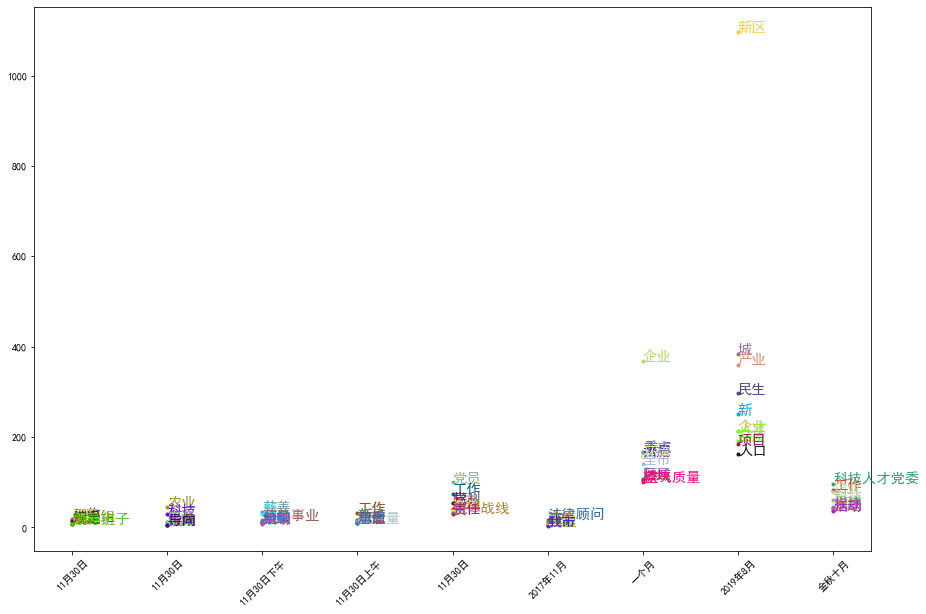

In [8]:
name='_平'
field='ATTR'
draw_point(name, field)

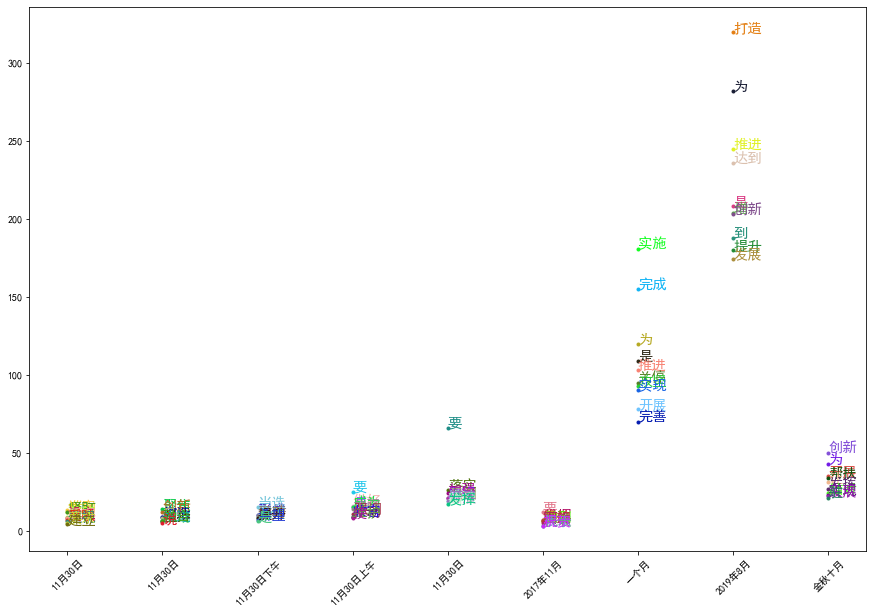

In [9]:
name='_平'
field='BEHAVE'
draw_point(name, field)

In [10]:
def draw_bar(name, field):
    """
    绘制词汇的柱状图
    name: 人名
    field: 绘制的域
    """
    # 人名
    per_name = name

    # 绘制属性
    df = dfs[dfs['PER'].str.contains(per_name)]
    df = df.reset_index(drop=True)

    PLOT_FIELD = field

    time_lst = []
    for ts in df['TIME']:
        ts = eval(ts)
        time_lst += ts
    time_lst = sorted(set(time_lst))
    xtick = []
    xindx = []
    coln = 3
    rown = math.ceil(len(df) / 3)
    plt.figure(figsize=(coln * 7, rown * 6))
    for index, times, values in df[['TIME', PLOT_FIELD]].itertuples(index=True):
        times = eval(times)
        time = ''
        for t in times:
            if '月' in t:
                time = t
                break
        counter = eval(values).most_common()[:10]
        plt.subplot(rown, coln, index+1)
        plt.bar([k for k, v in counter], [v for k, v in counter])
        plt.xlabel(f"Time:{time}")

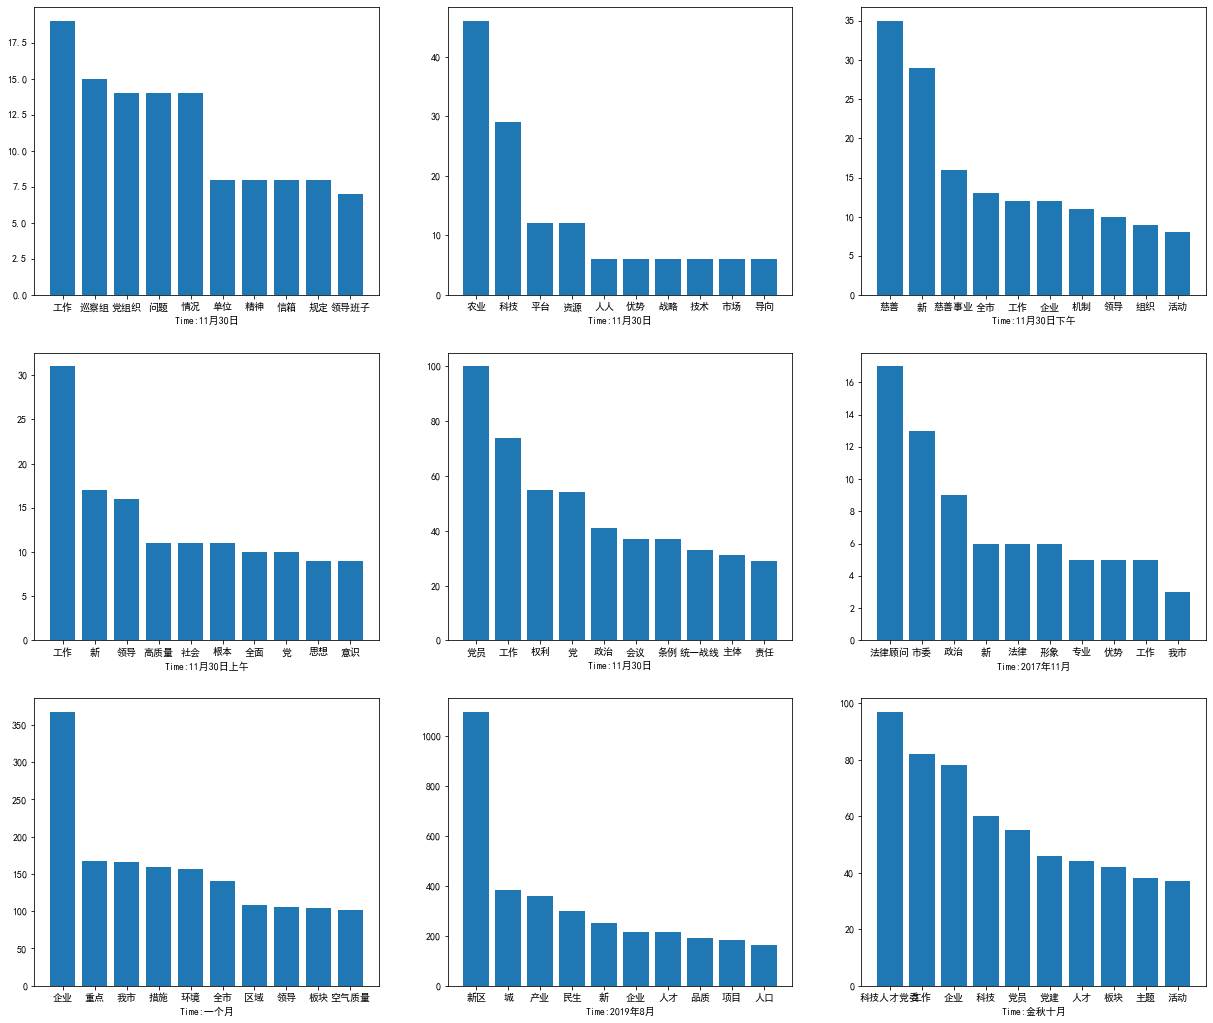

In [11]:
name='_平'
field='ATTR'
draw_bar(name, field)

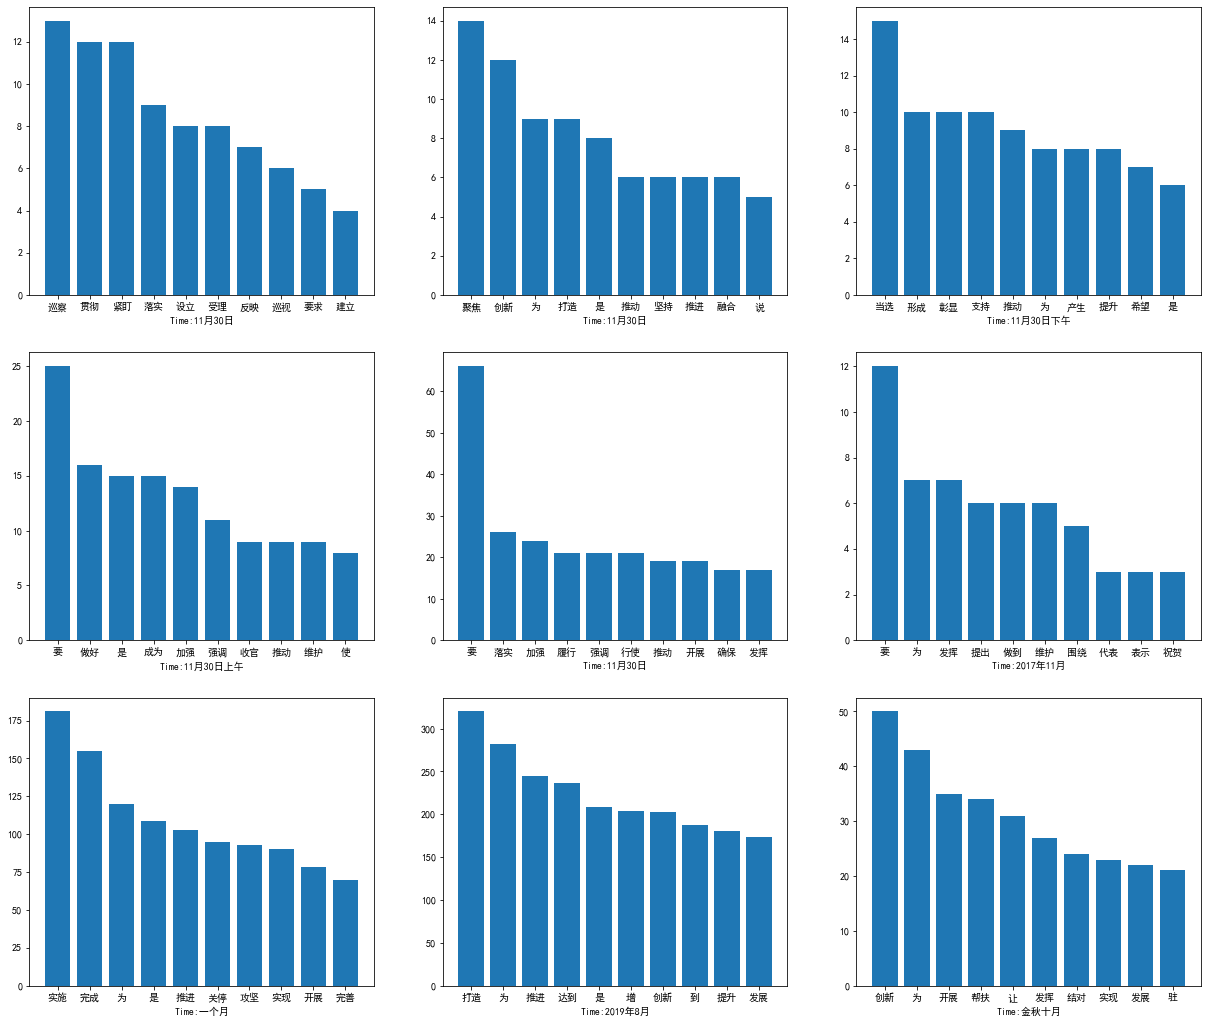

In [12]:
name='_平'
field='BEHAVE'
draw_bar(name, field)

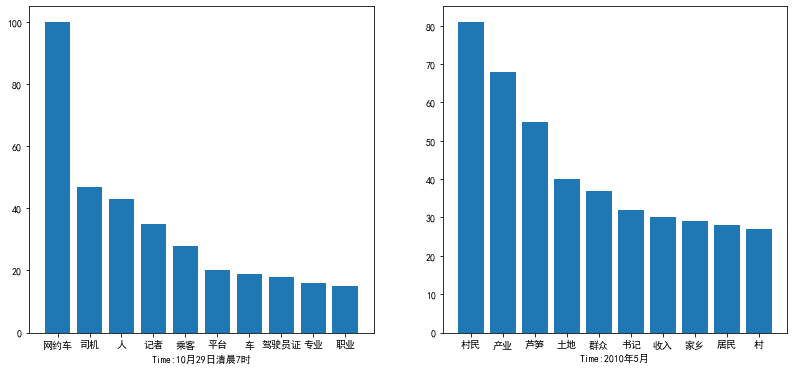

In [13]:
name='余梦娇'
field='ATTR'
draw_bar(name, field)